In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
database = pd.read_csv('database.csv')

database.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,79,oral_cavity_cancer,12.259970,7.822784,7.076852,9.932529,6.079321,8.884615,7.078590,6.375017,...,14.097388,13.808292,14.879530,14.770789,6.277723,5.492216,4.872947,4.504117,5.058785,4.959956
1,80,oral_cavity_cancer,12.089249,7.754616,7.640473,10.528756,5.600609,9.038594,7.191701,6.505015,...,14.150997,13.975202,14.868461,14.710410,6.056832,5.809288,4.551575,4.536802,5.166772,5.218432
2,81,oral_cavity_cancer,12.253493,8.331198,6.980443,9.786068,5.357674,7.671959,6.878982,6.686758,...,13.171790,12.663488,14.375815,14.229668,5.902731,5.552099,4.660518,4.428401,4.990019,4.845970
3,82,oral_cavity_cancer,12.784522,8.175401,7.303593,9.868314,5.524533,7.802572,6.849571,6.628684,...,13.348310,12.854595,14.562390,14.354983,5.964846,5.588120,4.667251,4.555028,5.090857,4.773182
4,83,oral_cavity_cancer,12.594939,7.766172,8.706035,9.887563,5.529864,8.735436,6.943179,6.550663,...,13.820435,13.565086,14.817541,14.686170,5.594160,5.640937,4.492807,4.503870,4.920595,4.946553


(array([74.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 29.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

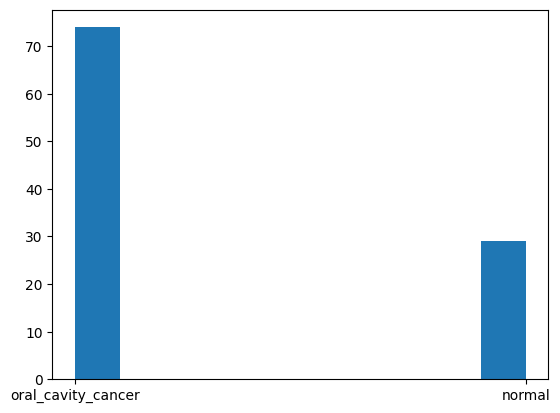

In [3]:
#visualizing the data as histogram
plt.hist(database['type'], bins=10)

In [4]:
# show the statistical data
database.describe()

,samples,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,130.000000,11.909303,7.822664,7.495556,9.755477,5.377928,8.422941,6.780695,6.554503,7.671374,...,13.022703,12.583274,14.214115,13.995228,5.730335,5.601484,4.651200,4.443650,4.905753,4.966068
std,29.877528,0.469292,0.435623,0.522740,0.258391,0.333414,0.514268,0.398211,0.211478,1.199481,...,0.830003,0.941017,0.497596,0.557392,0.204440,0.189437,0.134011,0.130656,0.147765,0.165453
min,79.000000,10.313773,6.807877,6.683287,9.032370,4.869924,7.374076,6.091047,6.148751,6.031169,...,10.729955,10.100643,12.708982,12.367983,5.359773,5.248962,4.397799,4.244279,4.667147,4.699513
25%,104.500000,11.630727,7.519316,7.099225,9.624324,5.168933,8.107801,6.483554,6.411720,6.922406,...,12.549359,12.077207,13.991799,13.703445,5.611148,5.482932,4.563774,4.345157,4.804340,4.851155
50%,130.000000,12.002231,7.817413,7.443384,9.796006,5.296831,8.385825,6.675388,6.506919,7.439504,...,13.131397,12.695976,14.327761,14.084643,5.693648,5.578422,4.627485,4.405238,4.880528,4.946553
75%,155.500000,12.230513,8.155306,7.744078,9.891959,5.479766,8.733781,7.050058,6.666475,8.016084,...,13.690351,13.310064,14.562221,14.376013,5.836143,5.671415,4.727020,4.518909,4.978045,5.068988
max,181.000000,12.784522,8.928350,9.417635,10.528756,6.625142,9.848063,8.130789,7.112193,11.307001,...,14.471647,14.396562,15.088660,14.972834,6.364068,6.270623,5.126915,4.835954,5.366392,5.614073


In [5]:
database.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 43.0+ MB


In [6]:
# randomize the data
database = database.drop('samples', axis=1)
database.loc[database['type'] == 'normal', 'type'] = 0
database.loc[database['type'] == 'oral_cavity_cancer', 'type'] = 1

database['type'] = database['type'].astype(int)

X = database.drop('type', axis=1)
y = database['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# change the type column to first column
cols = list(train_data.columns)
cols.insert(0, cols.pop(cols.index('type')))
train_data = train_data.loc[:, cols]
test_data = test_data.loc[:, cols]


In [7]:
database.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Columns: 54676 entries, type to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1)
memory usage: 43.0 MB


(array([19.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 53.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

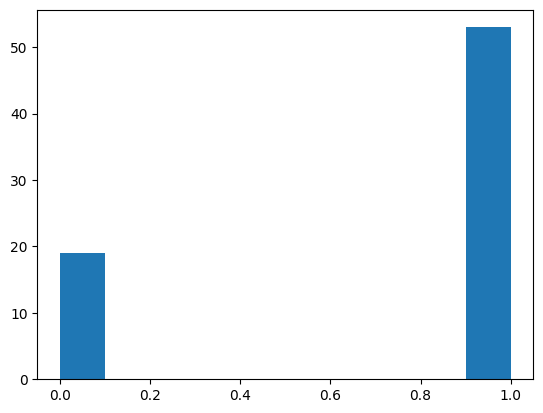

In [8]:
# plot the histogram of the training data to see the distribution
plt.hist(train_data['type'])

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 21.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

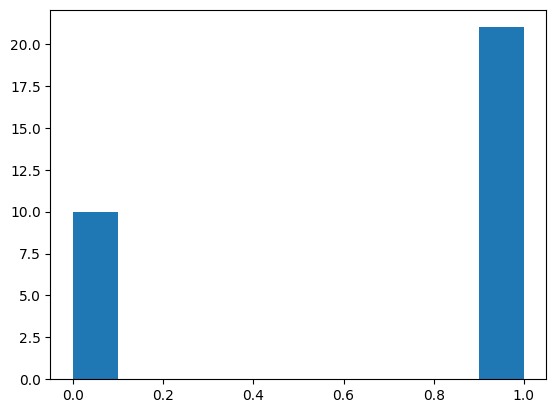

In [9]:
# plot the histogram of the testing data to see the distribution
plt.hist(test_data['type'])

In [10]:
%pip install torch

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [11]:
train_data.info(max_cols=1000)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 33 to 8
Columns: 54676 entries, type to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1)
memory usage: 30.0 MB


In [12]:
import torch.nn as nn

columnsSize = len(train_data.columns) - 1

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(columnsSize, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        return self.fc3(self.relu(self.fc2(self.relu(self.fc1(x)))))

In [13]:
model = Model()

import torch.optim as optim
import torch

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# convert the data into tensor
train_data_to_model = torch.tensor(train_data.values).float()
test_data_to_model = torch.tensor(test_data.values).float()


# train the model
epochs = 1000
for i in range(epochs):
    model.train()
    logits = model(train_data_to_model[:, 1:]).squeeze()
    loss = criterion(logits, train_data_to_model[:, 0])
    accuracy_score = ((logits >= 0.5) == train_data_to_model[:, 0]).float().mean()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

model.eval()

# test the model
logits = model(test_data_to_model[:, 1:]).squeeze()
loss = criterion(logits, test_data_to_model[:, 0])
accuracy_score = ((logits >= 0.5) == test_data_to_model[:, 0]).float().mean()

print('Accuracy score: ', accuracy_score)
print('Loss: ', loss)



Accuracy score:  tensor(0.8710)
Loss:  tensor(0.6946, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
